### This notebook is used for exploratory data analysis (EDA) and data processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# load data
empathies = pd.read_csv('./empathies.csv')
msg = pd.read_csv('./labeled_messages.csv')

# remove irrelevant column
del msg['ignore']
msg.dropna(inplace = True)
msg.shape

(3561, 3)

In [9]:
# transform label format for fastText model
msg['labels'] = msg['empathy'].apply(lambda x: ''.join(['__label__'+y.strip()+' ' for y in x.split(',')]))

In [10]:
msg.head(5)

,num_seen,message,empathy,labels
0,2884,tired,tired,__label__tired
1,253,exhausted,tired,__label__tired
2,61,drained,tired,__label__tired
3,31,tired but happy,"tired, happy",__label__tired __label__happy
4,30,im tired,tired,__label__tired


In [11]:
# randomly shuffle data
ids = np.arange(msg.shape[0])
np.random.shuffle(ids)
msg = msg.iloc[ids]

In [12]:
# save data
# msg.to_csv('./msg_fasttext.csv')

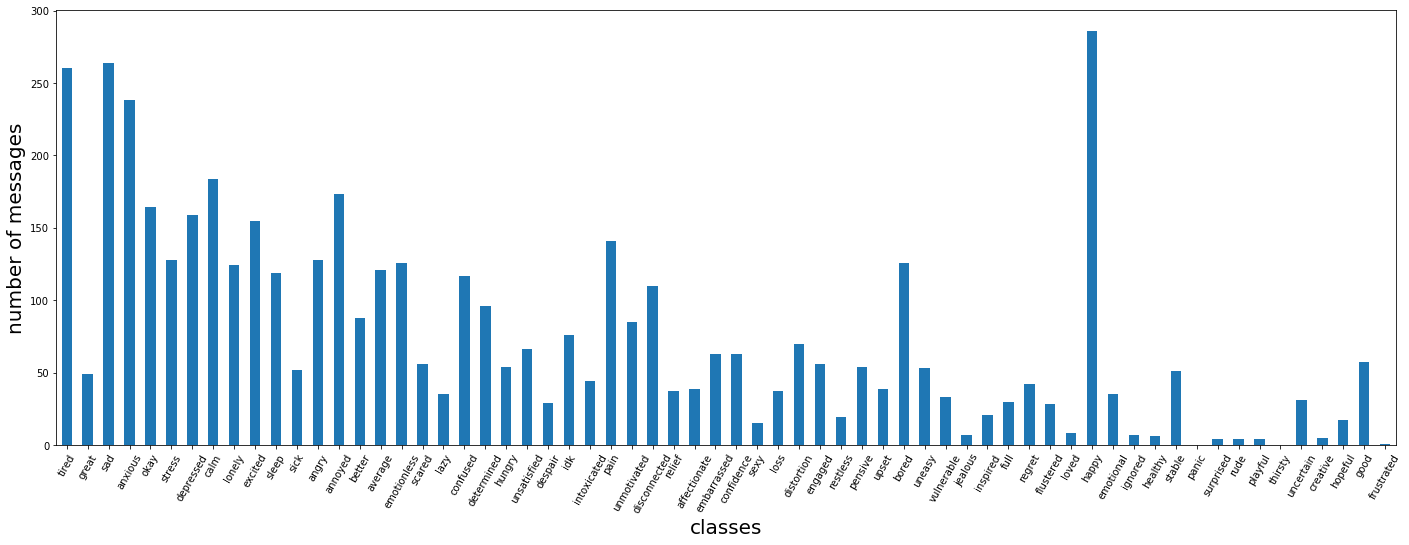

In [13]:
# generate a barchart of number of messages grouped by class
empathies['counts'] = 0

# get message counts for every class
for i in range(empathies.shape[0]):
    empathies.iloc[i, 2] = sum([1 if empathies.iloc[i, 0] in x else 0 for x in msg['empathy']])

ax = empathies['counts'].plot(kind='bar', figsize=(24, 8), rot=60)
_ = ax.set_xlabel("classes", fontsize=20)
_ = ax.set_ylabel("number of messages", fontsize=20)
_ = ax.set_xticklabels(empathies['empathy'])